In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.style.use('ggplot')
matplotlib.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14.0, 11.0)

In [15]:
data = pd.read_csv('data/orders_train.txt', sep=';')
# create explicit date objects
data['orderDate'] = pd.to_datetime(data['orderDate'])
# strings to integers
data['orderID'] = data['orderID'].apply(lambda x: x.replace('a', '')).astype(np.int)
data['articleID'] = data['articleID'].apply(lambda x: x.replace('i', '')).astype(np.int)
data['customerID'] = data['customerID'].apply(lambda x: x.replace('c', '')).astype(np.int)
data['voucherID'] = data['voucherID'].apply(lambda x: str(x).replace('v', '')).astype(np.float)
# remove nan in productGroup with 0 (zero was unused indeed) -- USE IMPUTATION OR LEARNING RATHER
data['productGroup'] = np.nan_to_num(data['productGroup']).astype(np.int)

In [16]:
data #index_col='orderID', 

,orderID,orderDate,articleID,colorCode,sizeCode,productGroup,quantity,price,rrp,voucherID,voucherAmount,customerID,deviceID,paymentMethod,returnQuantity
0,1000001,2014-01-01,1000382,1972,44,3,1,10.00,29.99,0,0,1010575,2,BPRG,0
1,1000001,2014-01-01,1000550,3854,44,3,1,20.00,39.99,0,0,1010575,2,BPRG,0
2,1000002,2014-01-01,1001991,2974,38,8,1,35.00,49.99,0,0,1045905,4,BPRG,0
3,1000002,2014-01-01,1001999,1992,38,8,1,49.99,49.99,0,0,1045905,4,BPRG,1
4,1000003,2014-01-01,1001942,1968,42,8,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0
5,1000003,2014-01-01,1001942,1972,42,8,1,10.00,35.99,0,0,1089295,2,PAYPALVC,0
6,1000003,2014-01-01,1001974,1001,42,8,1,25.00,39.99,0,0,1089295,2,PAYPALVC,0
7,1000003,2014-01-01,1001976,3976,44,8,1,15.00,39.99,0,0,1089295,2,PAYPALVC,0
8,1000003,2014-01-01,1002392,2493,42,13,0,0.00,59.99,0,0,1089295,2,PAYPALVC,0
9,1000004,2014-01-01,1002457,1001,42,14,1,89.99,89.99,0,0,1050116,3,BPRG,1


In [5]:
# Check if rows with 0 quantity can have a return quantity.
df_sub = data[data['quantity'] == 0]
df_sub = df_sub[df_sub['returnQuantity'] > 0]

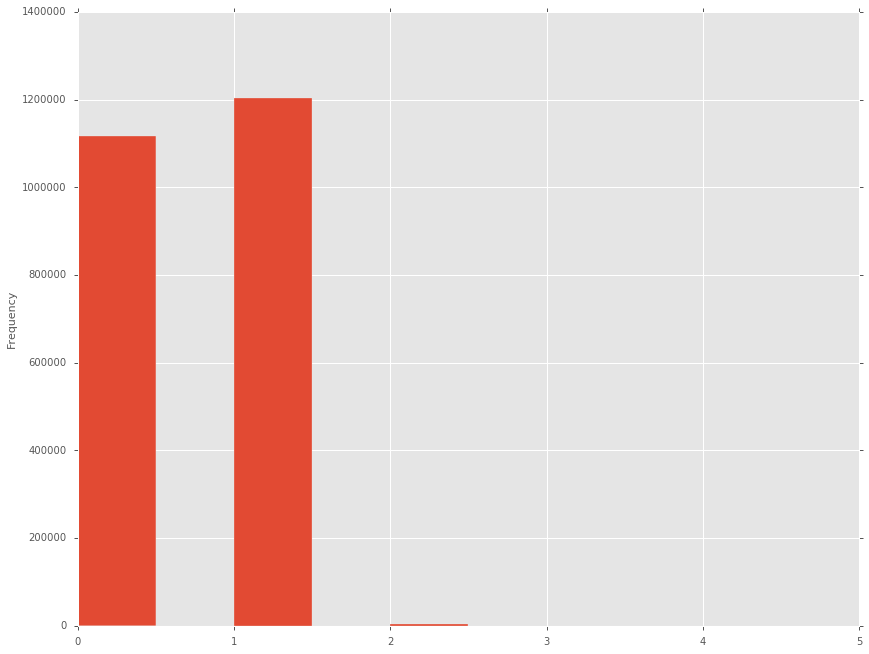

In [17]:
data.returnQuantity.plot.hist()

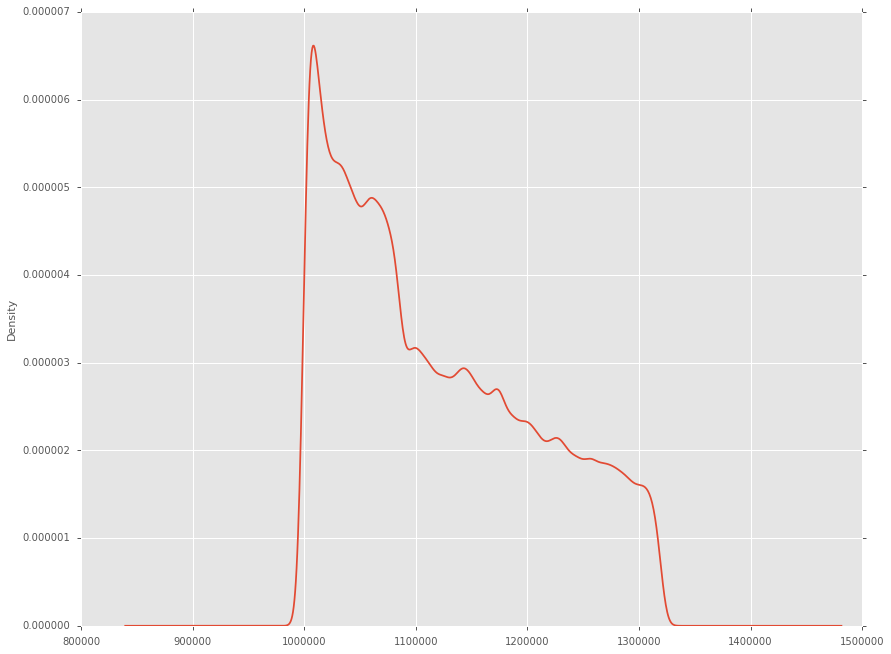

In [18]:
data.customerID.plot.kde()

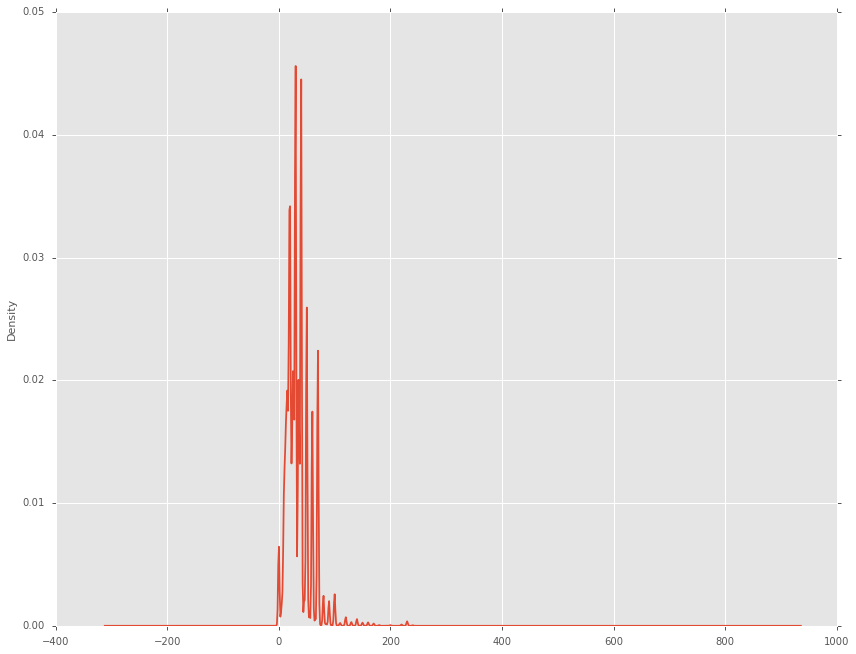

In [20]:
data.price.plot.kde()

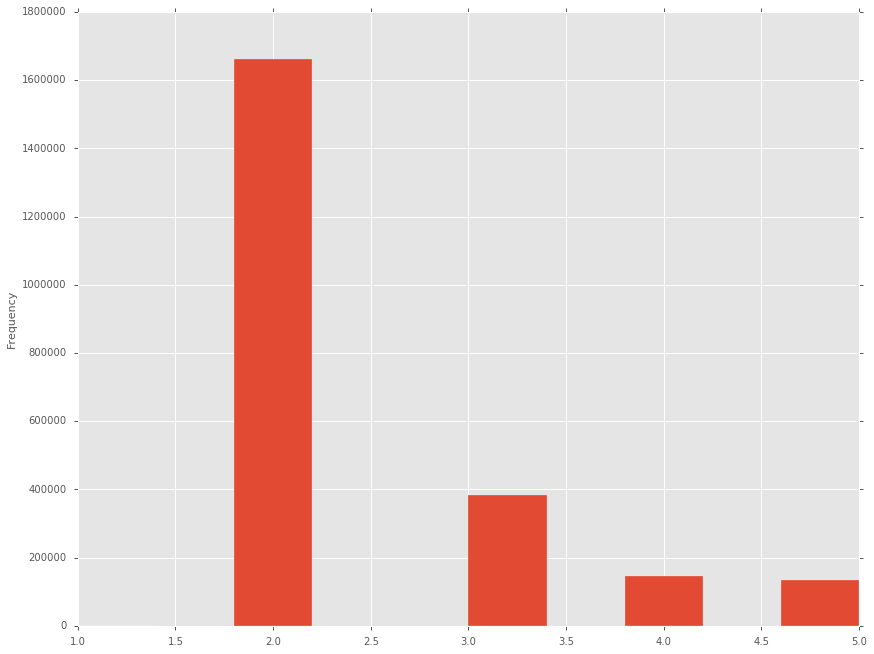

In [26]:
data.deviceID.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff270456c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff26a7f7cf8>]], dtype=object)

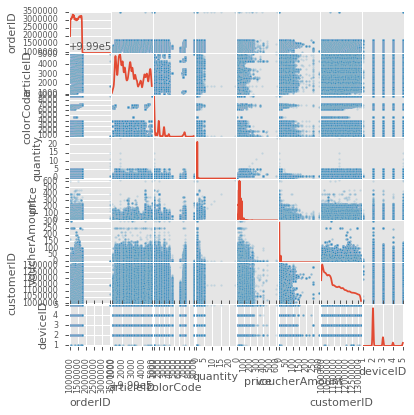

In [27]:
sub_data = data[['orderID', 'articleID', 'colorCode', 'sizeCode', 'quantity', 'price', 'voucherAmount', 'customerID', 'deviceID']]
pd.tools.plotting.scatter_matrix(sub_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [14]:
len(pd.unique(data[['orderID', 'articleID']].values)), len(data[['orderID', 'articleID']].values.ravel())

(1921178, 4650330)

In [30]:
set(data.voucherID)

{0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1000032.0,
 1000033.0,
 1000040.0,
 1000043.0,
 1000044.0,
 1000049.0,
 1000052.0,
 1000053.0,
 1000055.0,
 1000056.0,
 1000057.0,
 1000058.0,
 1000059.0,
 1000061.0,
 1000062.0,
 1000063.0,
 1000064.0,
 1000065.0,
 1000066.0,
 1000067.0,
 1000068.0,
 1000069.0,
 1000070.0,
 1000071.0,
 1000072.0,
 1000073.0,
 1000074.0,
 1000076.0,
 1000077.0,
 1000078.0,
 1000079.0,
 1000080.0,
 1000081.0,
 1000082.0,
 1000083.0,
 1000084.0,
 1000085.0,
 1000086.0,
 1000087.0,
 1000088.0,
 1000089.0,
 1000090.0,
 1000091.0,
 1000092.0,
 1000093.0,
 1000094.0,
 1000095.0,
 1000096.0,
 1000097.0,
 1000099.0,
 1000100.0,
 1000101.0,
 1000102.0,
 1000103.0,
 1000104.0,
 1000105.0,
 1000106.0,
 1000107.0,
 1000108.0,
 1000109.0,
 1000110.0,
 1000111.0,
 1000113.0,
 1000114.0,
 1000115.0,
 1000116.0,
 1000117.0,
 1000118.0,
 1000119.0,
 1000120.0,
 1000121.0,
 1000122.0,
 1000123.0,
 1000124.0,
 1000125.0,
 1000126.0,
 1000127.0,
 1000128.0,
 1000129.0,
 1000130.0

In [24]:
set(data.voucherAmount)

{0.0,
 1.0,
 2.5,
 3.5,
 4.0,
 5.0,
 5.5,
 4.5,
 8.5,
 7.0,
 10.0,
 11.0,
 7.5,
 13.800000000000001,
 13.0,
 14.0,
 16.199999999999999,
 17.0,
 18.0,
 18.300000000000001,
 18.399999999999999,
 19.5,
 18.100000000000001,
 23.0,
 24.0,
 25.0,
 25.600000000000001,
 27.0,
 28.5,
 28.199999999999999,
 30.0,
 31.789999999999999,
 32.990000000000002,
 6.0,
 30.600000000000001,
 30.390000000000001,
 36.0,
 33.5,
 34.0,
 37.189999999999998,
 40.009999999999998,
 8.0,
 42.390000000000001,
 39.990000000000002,
 44.0,
 44.289999999999999,
 9.5,
 9.0,
 47.090000000000003,
 49.990000000000002,
 50.0,
 50.009999999999998,
 10.5,
 44.090000000000003,
 54.990000000000002,
 54.479999999999997,
 11.5,
 57.590000000000003,
 57.090000000000003,
 2.0,
 56.590000000000003,
 12.5,
 12.0,
 56.490000000000002,
 57.990000000000002,
 65.0,
 13.5,
 67.260000000000005,
 59.020000000000003,
 61.880000000000003,
 70.010000000000005,
 14.5,
 72.489999999999995,
 14.25,
 67.489999999999995,
 68.689999999999998,
 15.0,
